In [7]:
import matplotlib
import numpy as np
from matplotlib.mlab import griddata
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import math
from scipy.spatial import KDTree
import time
import scipy.ndimage as ndi

%matplotlib inline

In [11]:
def grid_density_kdtree(xl, yl, xi, yi, dfactor):
    zz = np.empty([len(xi),len(yi)], dtype=np.uint8)
    zipped = zip(xl, yl)
    kdtree = KDTree(zipped)
    for xci in range(0, len(xi)):
        xc = xi[xci]
        for yci in range(0, len(yi)):
            yc = yi[yci]
            density = 0.
            retvalset = kdtree.query((xc,yc), k=5)
            for dist in retvalset[0]:
                density = density + math.exp(-dfactor * pow(dist, 2)) / 5
            zz[yci][xci] = min(density, 1.0) * 255
    return zz

array([-0.5       , -0.49607843, -0.49215686, -0.48823529, -0.48431373,
       -0.48039216, -0.47647059, -0.47254902, -0.46862745, -0.46470588,
       -0.46078431, -0.45686275, -0.45294118, -0.44901961, -0.44509804,
       -0.44117647, -0.4372549 , -0.43333333, -0.42941176, -0.4254902 ,
       -0.42156863, -0.41764706, -0.41372549, -0.40980392, -0.40588235,
       -0.40196078, -0.39803922, -0.39411765, -0.39019608, -0.38627451,
       -0.38235294, -0.37843137, -0.3745098 , -0.37058824, -0.36666667,
       -0.3627451 , -0.35882353, -0.35490196, -0.35098039, -0.34705882,
       -0.34313725, -0.33921569, -0.33529412, -0.33137255, -0.32745098,
       -0.32352941, -0.31960784, -0.31568627, -0.31176471, -0.30784314,
       -0.30392157, -0.3       , -0.29607843, -0.29215686, -0.28823529,
       -0.28431373, -0.28039216, -0.27647059, -0.27254902, -0.26862745,
       -0.26470588, -0.26078431, -0.25686275, -0.25294118, -0.24901961,
       -0.24509804, -0.24117647, -0.2372549 , -0.23333333, -0.22

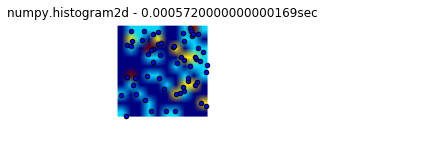

In [13]:
# def generate_graph():    
n = 1000
# data points range
data_ymin = -2.
data_ymax = 2.
data_xmin = -2.
data_xmax = 2.
# view area range
view_ymin = -.5
view_ymax = .5
view_xmin = -.5
view_xmax = .5
# generate data
xl = np.random.uniform(data_xmin, data_xmax, n)    
yl = np.random.uniform(data_ymin, data_ymax, n)
zl = np.random.uniform(0, 1, n)

# xl
# get visible data points
xlvis = []
ylvis = []
for i in range(0,len(xl)):
    if view_xmin < xl[i] < view_xmax and view_ymin < yl[i] < view_ymax:
        xlvis.append(xl[i])
        ylvis.append(yl[i])

fig = plt.figure()


#     # plot histogram
plt1 = fig.add_subplot(221)
plt1.set_axis_off()
t0 = time.clock()
zd, xe, ye = np.histogram2d(yl, xl, bins=10, range=[[view_ymin, view_ymax],[view_xmin, view_xmax]], normed=True)
plt.title('numpy.histogram2d - '+str(time.clock()-t0)+"sec")
plt.imshow(zd, origin='lower', extent=[view_xmin, view_xmax, view_ymin, view_ymax])
plt.scatter(xlvis, ylvis)


# plot density calculated with kdtree
plt2 = fig.add_subplot(222)
plt2.set_axis_off()
xi = np.linspace(view_xmin, view_xmax, 256)
yi = np.linspace(view_ymin, view_ymax, 256)
t0 = time.clock()

# zd = grid_density_kdtree(xl, yl, xi, yi, 70)
# plt.title('function of 5 nearest using kdtree\n'+str(time.clock()-t0)+"sec")
# cmap=cm.jet
# A = (cmap(zd/256.0)*255).astype(np.uint8)
# #A[:,:,3] = zd  
# plt.imshow(A , origin='lower', extent=[view_xmin, view_xmax, view_ymin, view_ymax])
# plt.scatter(xlvis, ylvis)

#     # gaussian filter
#     plt3 = fig.add_subplot(223)
#     plt3.set_axis_off()
#     t0 = time.clock()
#     zd = grid_density_gaussian_filter(view_xmin, view_ymin, view_xmax, view_ymax, 256, 256, zip(xl, yl))
#     plt.title('ndi.gaussian_filter - '+str(time.clock()-t0)+"sec")
#     plt.imshow(zd , origin='lower', extent=[view_xmin, view_xmax, view_ymin, view_ymax])
#     plt.scatter(xlvis, ylvis)

#     # boxsum smoothing
#     plt3 = fig.add_subplot(224)
#     plt3.set_axis_off()
#     t0 = time.clock()
#     zd = grid_density_boxsum(view_xmin, view_ymin, view_xmax, view_ymax, 256, 256, zip(xl, yl))
#     plt.title('boxsum smoothing - '+str(time.clock()-t0)+"sec")
#     plt.imshow(zd, origin='lower', extent=[view_xmin, view_xmax, view_ymin, view_ymax])
#     plt.scatter(xlvis, ylvis)